# Heart Disease Prediction

<h3> By Priyanka Roy </h3>

<b> Objectives: </b>

   * Explaining the features and target variable
   * Deal with the missing values
   * Performing One-hot Encoding
   * Splitting the dataset into 80% training and 20% for testing. Adding random state and stratification
   * Training with Decision Tree Classification
   * Tree diagram of the Decision Tree
   * Predict the value of 'Target Variable'
   * Showing the Confusion Matrix, Classification report, and ROC-AUC &
   * Determining the accuracy of the ML model
   * Explaining the model

<h4> Reference(s): </h4>   <br> 
[1] <a href="https://archive.ics.uci.edu/ml/datasets/heart+disease"> Dataset Source </a> <br>

[2] <a href="https://github.com/priyan-2020/Heart_Disease_Prediction_ML/blob/main/processed.cleveland.data"> My GitHub file </a>

<h3>Import required libraries for the analysis</h3>

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<h3>Loading The Dataset</h3>

In [2]:
df= pd.read_csv('processed.cleveland.data', header = None,na_values = '?')
df= df.dropna()
display(df.head())
#df.info()
print(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


(297, 14)


<h3>Renaming Columns</h3>

In [3]:
df.columns = ['Age', 'Sex', 'Chest_pain', 'Rest_BP', 'Cholestoral_Level', 'Fasting_Blood_Sugar', 
              'rest_ECG', 'Max_bpm', 'Aangina', 'old_peak', 
              'slope', 'CA', 'thal', 'Heart_disease']

display(df.head())

,Age,Sex,Chest_pain,Rest_BP,Cholestoral_Level,Fasting_Blood_Sugar,rest_ECG,Max_bpm,Aangina,old_peak,slope,CA,thal,Heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<h3>About the Dataset and checking for missing values</h3>

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  297 non-null    float64
 1   Sex                  297 non-null    float64
 2   Chest_pain           297 non-null    float64
 3   Rest_BP              297 non-null    float64
 4   Cholestoral_Level    297 non-null    float64
 5   Fasting_Blood_Sugar  297 non-null    float64
 6   rest_ECG             297 non-null    float64
 7   Max_bpm              297 non-null    float64
 8   Aangina              297 non-null    float64
 9   old_peak             297 non-null    float64
 10  slope                297 non-null    float64
 11  CA                   297 non-null    float64
 12  thal                 297 non-null    float64
 13  Heart_disease        297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


Age                    0
Sex                    0
Chest_pain             0
Rest_BP                0
Cholestoral_Level      0
Fasting_Blood_Sugar    0
rest_ECG               0
Max_bpm                0
Aangina                0
old_peak               0
slope                  0
CA                     0
thal                   0
Heart_disease          0
dtype: int64

<h4>Remarks/Observations:</h4> 
<h6>The dataset has following features-</h6>

* <b>age</b>: person's age in years
* <b>sex</b>: person's sex- 1 for male and 0 for female
* <b>cp</b>: chest pain type (4 values)- typical angina, atypical angina, non-anginal pain, asymptomatic
* <b>trestbps</b>: resting blood pressure
* <b>chol</b>: serum cholestoral in mg/dl
* <b>fbs</b>: fasting blood sugar > 120 mg/dl (1- T ; 0- F)
* <b>testecg</b>: resting electrocardiographic results where, 0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) and 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
* <b>thalach</b>: maximum heart rate achieved
* <b>exang</b>: exercise induced angina
* <b>oldpeak</b>: oldpeak = ST depression induced by exercise relative to rest
* <b>slope</b>: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
* <b>ca</b>: number of major vessels (0-3) colored by flourosopy
* <b>thal</b>: 3 = normal; 6 = fixed defect; 7 = reversable defect
* <b>hd</b>: heart disease, which is our <b>target variable</b> (0 = no, 1 = yes).

<h3>Target Variable: 'hd'/Heart_disease</h3>

In [5]:
print(df['Heart_disease'].value_counts())

0    160
1     54
2     35
3     35
4     13
Name: Heart_disease, dtype: int64


In [6]:
df[df['Heart_disease'] > 1] = 1

print(df['Heart_disease'].value_counts())
display(df.describe())

0    160
1    137
Name: Heart_disease, dtype: int64


,Age,Sex,Chest_pain,Rest_BP,Cholestoral_Level,Fasting_Blood_Sugar,rest_ECG,Max_bpm,Aangina,old_peak,slope,CA,thal,Heart_disease
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,38.750842,0.730640,2.390572,94.101010,176.754209,0.367003,0.942761,112.252525,0.437710,0.787879,1.336700,0.562290,3.286195,0.461279
std,24.818501,0.444376,1.197821,59.822795,117.816094,0.482801,0.846349,71.612180,0.496942,0.742977,0.546271,0.675582,2.083294,0.499340
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,48.000000,1.000000,2.000000,120.000000,218.000000,0.000000,1.000000,149.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000
75%,58.000000,1.000000,3.000000,135.000000,258.000000,1.000000,2.000000,164.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,1.000000


<h3>Creating Feature set and Target</h3>

In [7]:
X = df.drop('Heart_disease', axis=1)
y = df[['Heart_disease']]

print("Feature Set: ", X.shape)
print("Target Set: ", y.shape)

Feature Set:  (297, 13)
Target Set:  (297, 1)


<h3>Applying One-hot encoding</h3>

In [8]:
X = pd.get_dummies(X, columns=['Chest_pain', 'rest_ECG', 'slope', 'thal'], drop_first=True)

display(X.head())
print(X.shape)

,Age,Sex,Rest_BP,Cholestoral_Level,Fasting_Blood_Sugar,Max_bpm,Aangina,old_peak,CA,Chest_pain_2.0,Chest_pain_3.0,Chest_pain_4.0,rest_ECG_1.0,rest_ECG_2.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,1,0,0


(297, 19)


<h3>Splitting the dataset into test-train set</h3>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 63, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 19) (60, 19) (237, 1) (60, 1)


<h3>Creating the Machine Learning Model</h3>

In [10]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

<h3>Prediction</h3>

In [11]:
y_pred = model_DT.predict(X_test)

<h3>Prediction Comparison</h3>

In [12]:
y_test['probability'] = np.round(model_DT.predict_proba(X_test)[:,1], 2)
y_test['predicted_Heart_disease'] = y_pred

display(y_test.sample(10))

,Heart_disease,probability,predicted_Heart_disease
110,1,1.0,1
112,0,0.0,0
21,0,1.0,1
47,1,1.0,1
300,1,1.0,1
60,1,1.0,1
254,0,0.0,0
37,1,1.0,1
85,0,0.0,0
226,0,0.0,0


<h3>Tree Diagram of the Decision Tree</h3>

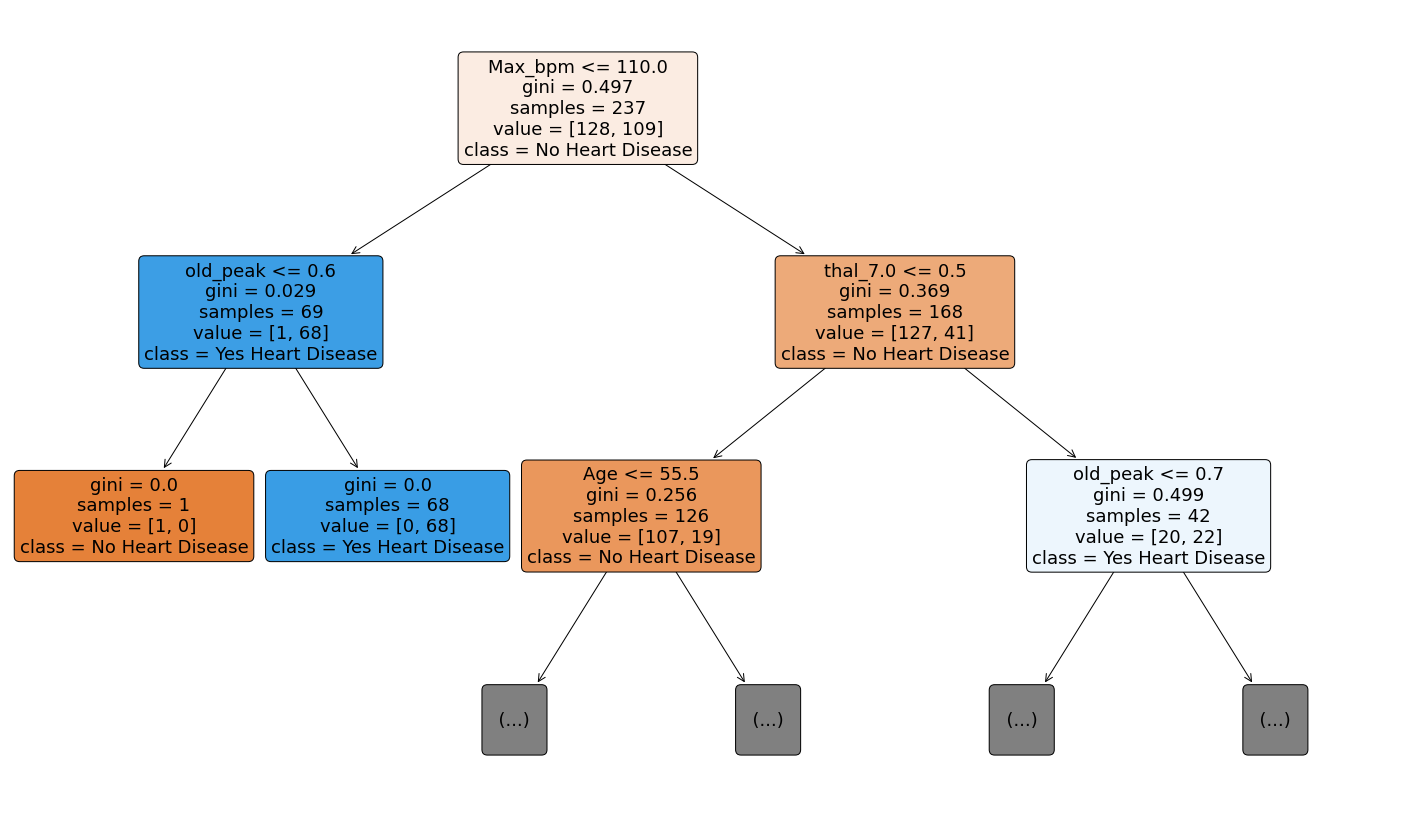

In [13]:
plt.figure(figsize = (25, 15))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No Heart Disease", "Yes Heart Disease"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=18)

plt.show()

<h3>Performance Evaluation</h3>

<h3>Confusion Matrix</h3>

In [14]:
confusion_matrix_ = confusion_matrix(y_test['Heart_disease'], 
                                     y_test['predicted_Heart_disease'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[27  5]
 [ 2 26]]


In [15]:
y_test['Heart_disease'].value_counts()

0    32
1    28
Name: Heart_disease, dtype: int64

In [16]:
TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)


FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

True Positives =  26
True Negatives =  27
False Positives =  5
False Negatives =  2


<h4>Remarks:</h4>

* Here we can see from the values that the numbers of false positive and false negative are very tiny which claims this model can predict pretty accurately (correctly). 
<br>

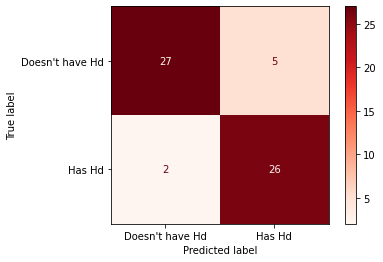

In [17]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test['Heart_disease'], 
                      display_labels=["Doesn't have Hd", "Has Hd"],
                      cmap='Reds')
plt.show()

<h4>Accuracy</h4>

In [18]:
# calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test['Heart_disease'], 
                           y_test['predicted_Heart_disease'])*100

print('Accuracy = ', np.round(accuracy, 2),"%")

Accuracy =  88.33 %


<h4>True Positive-False Positive Ratio:</h4>

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision_ = np.round(precision_score(y_test['Heart_disease'], 
                               y_test['predicted_Heart_disease']), 2)
recall_ = np.round(recall_score(y_test['Heart_disease'], 
                               y_test['predicted_Heart_disease']), 2)
f1_score_ = np.round(f1_score(y_test['Heart_disease'], 
                               y_test['predicted_Heart_disease']), 2)

print("Precision = ", precision_*10,"out of 10")
print("Recall = ", recall_*10,"out of 10")
print("f1 score = ", np.round(f1_score_*10, 2),"out of 10") 

Precision =  8.4 out of 10
Recall =  9.3 out of 10
f1 score =  8.8 out of 10


In [20]:
precision_rate = TP / (TP + FP)
recall_rate = TP / (TP + FN)
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)

The precision rate is:  0.8387096774193549
The recall rate is:  0.9285714285714286


<h4>Remarks:</h4>

The <b>recall rate</b> is about <b>93% </b>, that is, still 7% of the patients who has heart disease will be diagnosed wrong. But as of now, it's good enough to continue. And the precision rate is also good (about <b>84%</b>). We know, the higher these values, the better the model. 

<br>

<h3>Classification report</h3>

In [21]:
class_report = classification_report(y_test['Heart_disease'], 
                                   y_test['predicted_Heart_disease'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.84      0.93      0.88        28

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



<h3>ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve</h3>

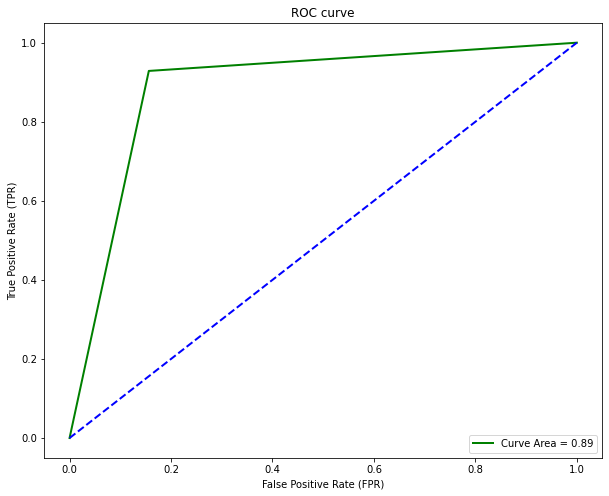

In [22]:
fpr, tpr, thr = roc_curve(y_test['Heart_disease'], 
                          y_test['predicted_Heart_disease'])
auc = np.round(roc_auc_score(y_test['Heart_disease'], 
                             y_test['predicted_Heart_disease']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn import metrics

metrics.auc(fpr, tpr)

0.8861607142857143

<h4>Remarks:</h4> 

If the AUC is in the range of 0.5~1, that means the model has value of prediction. The higher the score is, the better the model is. Moreover, the model will be a perfect classifier if the AUC equals to one. We got almost <b>0.9</b> of the AUC score, not bad at all!

<br>

<h3>Model Outcome</h3>

  This model has an accuracy of <b>88.33%</b> (with random state= 63 as we found some variations with different state no. but this is the highest accuracy state) which explains that while dealing with the dataset this model is preety handy because we know, when the accuracy rate of a model > 85% we can call that model good enough. Although, many more ML algorithms might result more fruitful considering a better accuracy and recall rate which could be explored later. 
  
<h6>Thanks for joining in this data exploratory mission with me.</h6>